<h1><center><font color='blue'>Testear la  Sigmoide, Tanh, y Relu sobre el dataset del MNIST </font></center></h1>


<h2>Objetivo</h2><ul><li> Aplicar diferentes funciones de activación sobre el dataset del MNIST</li></ul> 


<h2>Tabla de contenido</h2>

<ul>
    <li><a href="#Model">Módulo red neuronal y función de entrenamiento</a></li>
    <li><a href="#Makeup_Data">Crear algunos datos</a></li>
    <li><a href="#Train">Definir varias redes neuronales, funciones de criterio y optimizadores</a></li>
    <li><a href="#Test">Testear la Sigmoide, Tanh, y Relu</a></li>
    <li><a href="#Result">Analizar los resultados</a></li>
</ul>
<p></p>
</div>

<hr>


<h2>Preparación</h2>


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pylab as plt
import numpy as np

<!--Empty Space for separating topics-->


<h2 id="Model">Módulo red neuronal y función de entrenamiento</h2> 


Definimos el módulo red neuronal usando la sigmoide como función de activación:


In [5]:
# Build the model with sigmoid function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

Ahora usando la tangente hiperbólica:


In [6]:
# Build the model with Tanh function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
     
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))  
        x = self.linear2(x)
        return x

Ahora usando Relu:


In [7]:
# Build the model with Relu function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = self.linear2(x)
        return x

Definimos una función para entrenar el modelo. Retorna un diccionario para almacenar la pérdida de entrenamiento para cada iteración y la precisión sobre los datos de validación.


In [8]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())
            
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Creamos algunos datos</h2> 


Cargamos el dataset de entrenamiento:


In [9]:
# Create the training dataset

train_dataset = dsets.MNIST(root='/data/', train=True, download=True, transform=transforms.ToTensor()) #./data

Cargamos el dataset de validación:


In [11]:
# Create the validation  dataset

validation_dataset = dsets.MNIST(root='/data/', train=False, download=True, transform=transforms.ToTensor())

Creamos la función de criterio: 


In [12]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Creamos los cargadores de entrenamiento y validación:

In [13]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->


<h2 id="Train">Definimos la red neuronal, función de criterio, optimizador y entrenamos</h2> 


Creamos la función de criterio:


In [14]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Creamos el modelo con 100 neuronas ocultas:


In [15]:
# Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

<!--Empty Space for separating topics-->


<h2 id="Test">Testeamos la Sigmoide, Tanh, y Relu</h2> 


Entrenamos la red usando la sigmoide:


In [16]:
# Train a model with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

Entrenamos eo modelo usando tanh:


In [17]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

Entrenamos el modelo usando Relu:

In [18]:
# Train a model with Relu function

modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu,criterion, train_loader, validation_loader, optimizer, epochs=30)

<!--Empty Space for separating topics-->


<h2 id="Result">Analizamos los resultados</h2> 


Comparamos la pérdida de entrenamiento para cada activación: 


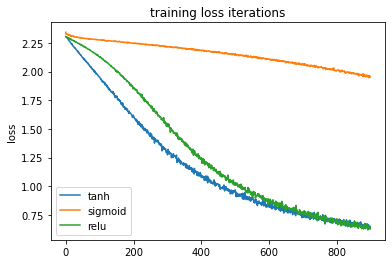

In [19]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

Comparamos la pérdida de validación para cada activación:


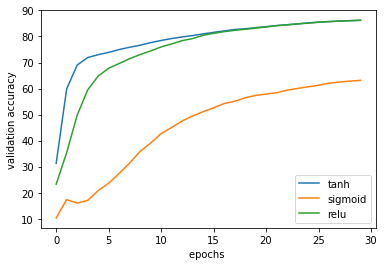

In [20]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()

<!--Empty Space for separating topics-->
